In [1]:
from phi.flow import *

__type_params__ must be set to a tuple


ModuleNotFoundError: No module named 'phi.flow'

1. A single vector representing the point x = 0, y = 1, z = 0.


/home/matteot/anaconda3/lib/python3.11/site-packages/phi/field/_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)


<Figure size 1200x500 with 1 Axes>

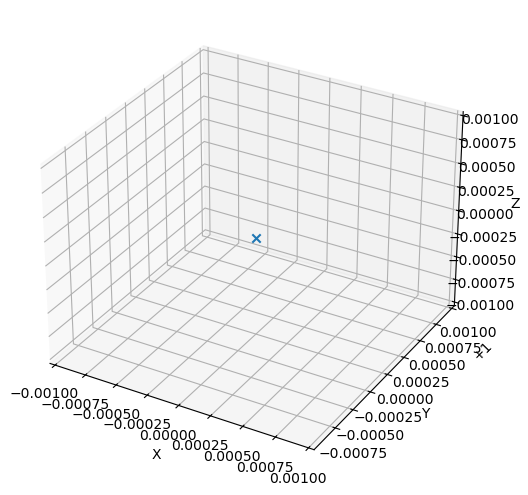

In [4]:
plot(tensor([0,1,0], channel(vector='x,y,z')))

2. Two columns of points, at x = 0 and x = 1, 10 points per column linearly spaced
between 0 and 1.

<Figure size 1200x500 with 1 Axes>

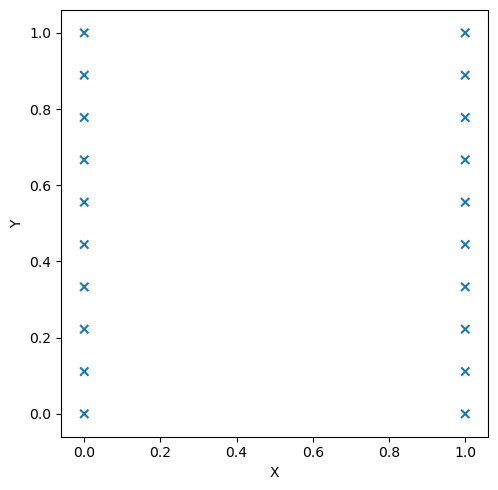

In [20]:
plot(tensor( (tensor((0,1), instance(cols=2)), math.linspace(0,1, instance(rows=10))) , channel(vector='x,y')))

3. A time-dependent waveform or signal consisting of 100 samples. Each sample is
uniformly distributed between -1 and 1.

<Figure size 1200x500 with 1 Axes>

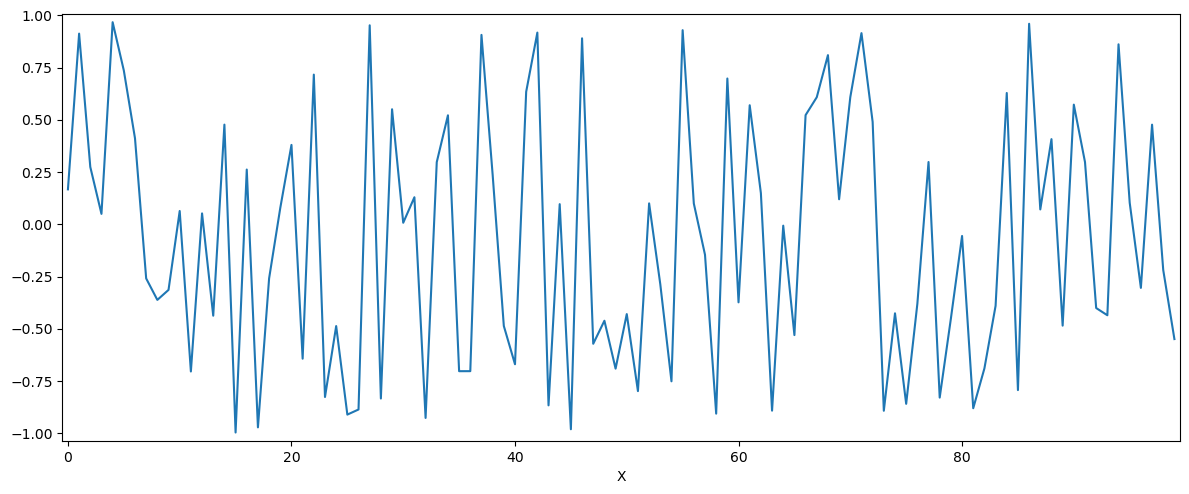

In [22]:
plot(math.random_uniform(spatial(x=100), low=-1, high=1))

4. Three such curves in one plot, centered around 0, 1 and 2, respectively

<Figure size 1200x500 with 1 Axes>

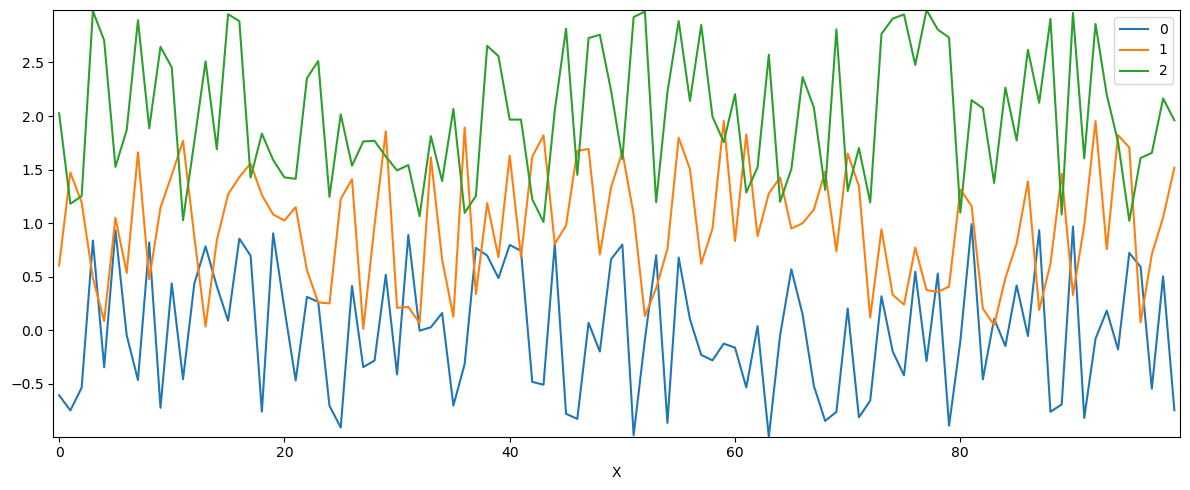

In [530]:
plot(math.random_uniform(channel(plots=3), spatial(x=100), low=-1, high=1) + (0, 1, 2))

5. A two-dimensional scalar 10x10 grid. Each value is sampled from a normal distribution but all edge values are zero

<Figure size 1200x500 with 2 Axes>

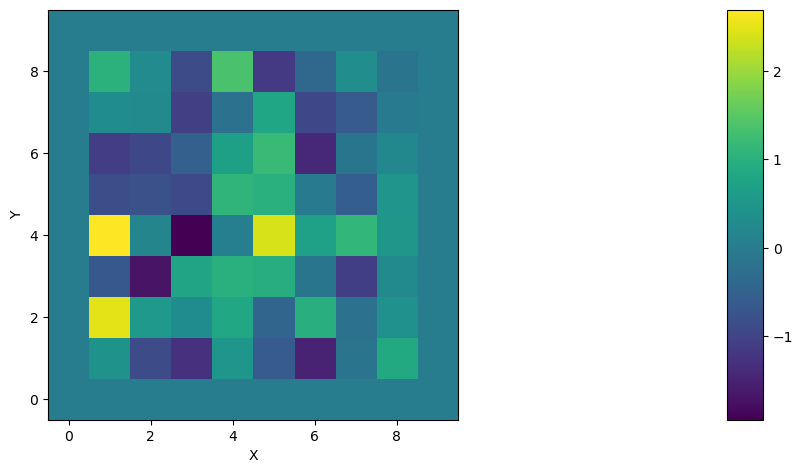

In [6]:
plot(math.pad(math.random_normal(spatial(x=8, y=8)), {'x': (1, 1), 'y': (1, 1)}, 0))

6. Three such plots next to each other, with edge values -1, 0, and 1, respectively.

<Figure size 1200x500 with 6 Axes>

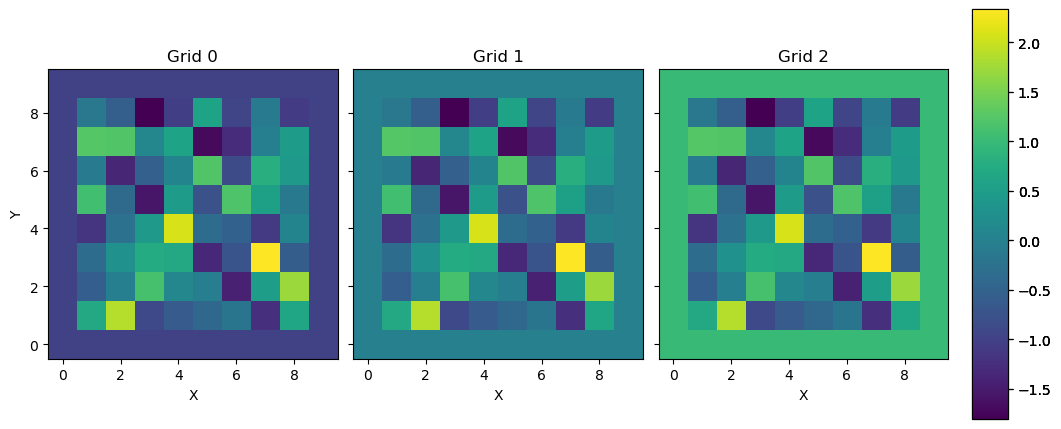

In [36]:
plot(math.pad(value=math.random_normal(spatial(x=8, y=8)), widths={'x': (1, 1), 'y': (1, 1)}, mode=tensor((-1, 0, 1), batch(plots=3))))

## Bouncing Balls Simulation

In [49]:
x0 = math.zeros(instance(balls=10), channel(vector='x,y')) + (0, 1)

In [136]:
# Generate initial velocities
v0_abs=3
angles = math.linspace(0, math.pi / 2, instance(balls=10))
v0 = tensor((v0_abs*math.cos(angles), v0_abs*math.sin(angles)), channel(vector='x,y'))

In [53]:
balls = PointCloud(Sphere(x0, radius=.1), v0)

In [66]:
def sim_step(balls, dt=.1):
    friction=0.7
    elasticity=0.8
    gravity=( 0, 9.81 * dt )

    v_new = advect.points(balls, balls, dt)
    v_new -= gravity
    v_new *= friction ** dt

    check_floor = (v_new.points < 0)
    v_new = v_new.with_elements(v_new.elements.shifted(math.where(check_floor, -v_new.points, 0)))
    v_new = v_new.with_values(math.where(check_floor, -v_new.values * (0, elasticity), v_new.values))
    
    return v_new

In [73]:
simulation = iterate(sim_step, batch(t=100), balls)
plot(simulation.elements, animate='t')

/home/matteot/anaconda3/lib/python3.11/site-packages/phi/field/_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)


<Figure size 1200x500 with 1 Axes>

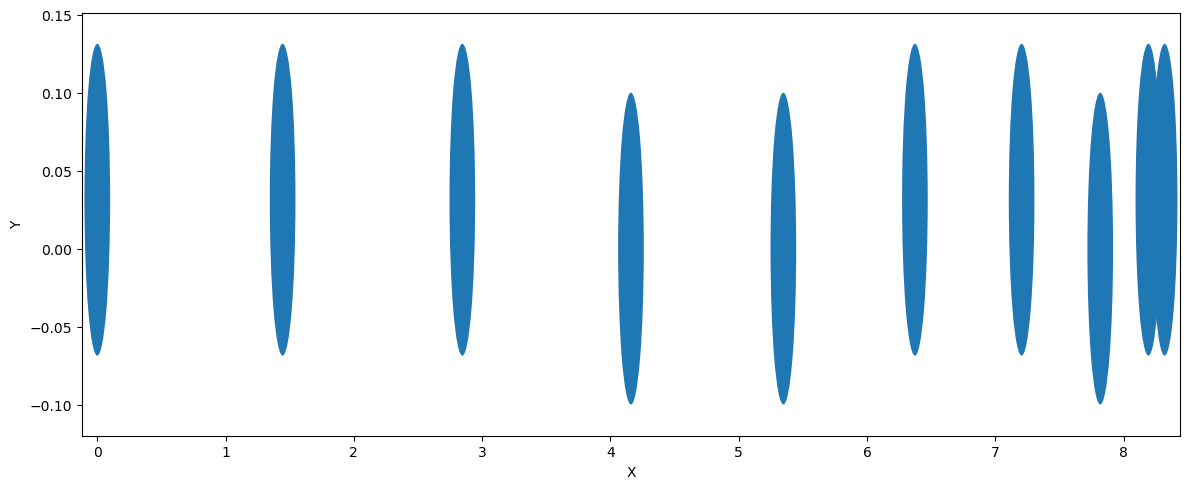

In [135]:
final_state = simulation.elements.unstack("t")[-1] 
plot(final_state)